# Analiza komunikacijskih omrežij z uporabo teorije grafov

## Uporaba grafov za predstavitev omrežnih topologij

IKT omrežja lahko prestavimo s pomočjo grafa, kjer so mrežni elementi (usmerjevalnik..) predstavljeni kot vozlišča, ter komunikacijske povezave kot povezave grafa. Povezavam lahko določimo tudi usmeritev ali ceno prenosa oziroma kapaciteto. V vaji bomo konstruirali mrežne grafe in jih analizirali s pomočjo algoritmov.

> ICT networks can frequently be presented as graphs where each network element (router, buffer…)
translates into a graph node and each connection between elements translates into a graph edge. In some cases edges can also be given direction (non-symmetric connections) and price / capacity. In this exercise we will learn to construct network graphs and analyse them using the breadth/depth-first search. 

## Programska orodja

Uporabljali bomo knjižnico `networkx`, ki omogoča ustvarjanje grafov in njihovo analizo. Navodila za uporabo so tukaj: 

https://networkx.github.io/documentation/stable/tutorial.html


In [1]:
!pip install networkx


import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Naloga 1

Prvi graf bo vseboval 8 vozlišč s povezavami. Dodali bomo vozlišča in povezave ter jih prikazali v sliki, ter dodali še oznake vozlišč.
* Kreiraj prazen graf s številom vozlišč : G = nx.empty_graph(8);  
* Dodaj povezave : G.add_edge(0,1);
* Določi položaj vozlišč na sliki, avtomatsko (pos = nx.circular_layout(G);) ali ročno
* (optional) Dodaj oznake vozlišč

![Graf primer 1](Graf1.png "Graf primer 1")

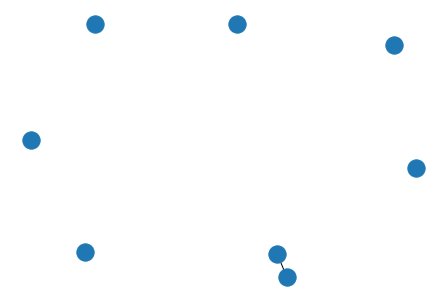

In [19]:
# prepare an empty figure
plt.figure() 
# Kreiraj prazen graf
G = nx.empty_graph(8);  

# Dodajaj povezave
G.add_edge(0,1); # Add connection between node 0 and 1
#G.add_edges_from([(0,2),(1,3)]); #We can also add several connections at once

## Generiraj položaje vozlišč
pos = nx.spring_layout(G); 
#pos = nx.circular_layout(G);

# Izriši
nx.draw(G,pos);


## Ročno definiraj položaje
#pos = { 0 : [0,1], 1 : [1,2] }; #ali pa jih napišemo sami

#Plot the graph
#nx.draw(G,pos);

#Define node labels as a dictionary, key => node number, value => node name
labels={}
labels[0] = '1'
labels[1] = '2'
labels[2] = '3'

#nx.draw_networkx_labels(G,pos,labels,font_size=20); #add labels
plt.show(); #show the graph


## Matrika sosednosti

Eden izmed bolj pogostih načinov predstavitve grafa je pogosto matrika sosednosti, ki je lahko poljbuno kompleksna, odvisno od lastnosti grafa. V Pythonu jo lahko izdelamo avtomatsko s pomočjo funkcije : nx.adjacency_matrix(G);



In [12]:
# adjM = nx.to_numpy_matrix(G)
# print(adjM)

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


### Naloga 2:

Uporabi matriko sosednosti in izriši graf. Nato dodaj nekaj povezav v matriko, in izriši nov graf. 

H = nx.from_numpy_matrix(adjM)

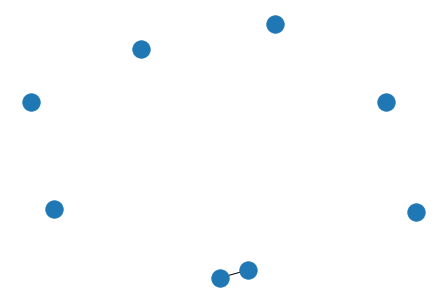

In [16]:
H = nx.from_numpy_matrix(adjM)
plt.figure()

#Plot the graph
nx.draw(H,pos)

### Nekaj primerov grafov


In [17]:
plt.figure()
N = nx.gnm_random_graph(10,15)  #Randomly generated
pos = nx.circular_layout(N);

#nx.draw(G,pos);
#nx.draw_networkx_labels(G,pos); 

plt.figure();

M = nx.barbell_graph(8,1);  #Two connected sub-networks
pos = nx.circular_layout(M);
#nx.draw(H,pos);
#nx.draw_networkx_labels(H,pos);

plt.figure();

O = nx.complete_graph(15);  #A full graph (all possible connections exist)
pos = nx.circular_layout(O);
#nx.draw(N,pos); # Plot graph
#nx.draw_networkx_labels(N,pos); # Plot node labels

plt.figure();

P = nx.hypercube_graph(5);  # 5-dimensional cube
pos = nx.circular_layout(P);
#nx.draw(M,pos); 
#nx.draw_networkx_labels(M,pos);

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Metode analize grafov - sprehod v širino / globino 

Algorimi za pregledovanje grafa so zelo koristni tako za pridobivanje osnovnih informacij o omrežju (npr. ali so vsa vozlišča povezana med seboj), kot tudi za opravljanje določenih analitičnih nalog kot so izdelava vpetega drevesa, detekcija kritičnih točk v omrežju, iskanje najkrajše poti ali reševanje zadanih nalog podanih v obliki grafa.

## Primer grafa
Uporabljali bomo zgornji prvi graf (G).


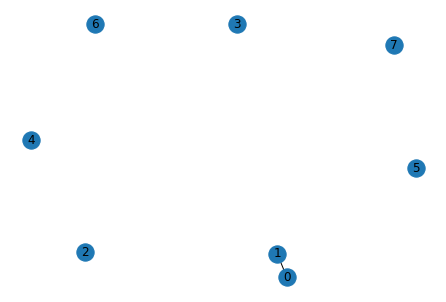

In [20]:

#Plot the graph
nx.draw(G,pos);
nx.draw_networkx_labels(G,pos); # Plot node labels

## Depth first search (DFS):  Sprehod v globino

Za sprehod v globino je značilno to, da iz izvornega vozlišča potuje kolikor daleč je le možno. Šele nato se vrne nazaj v izhodišče in preizkusi drugo pot. Zato se algoritem lahko uporabi za naloge kot so iskanje poti iz labirinta. 

> The depth first search starts from the selected node and tries to reach as many nodes as possible. Once it cannot proceed further it starts to backtrack it's steps until it finds a connection that allows it to progress deeper into the graph again. The advantage of such an approach is that it can traverse the graph quickly and reach it's extreme end. A good example of practical use of such an algorithm is finding a solution for a maze.

https://en.wikipedia.org/wiki/Depth-first_search


Izberemo začetno vozlišče in izpišemo zaporedje prehodov vozlišč:

In [21]:
startNode = 3
print (list(nx.dfs_edges(G,startNode)))

[]


> We can print a list of successors (i.e. a list of nodes connected to each visited node) and draw a directed graph that demonstrates how the algorithm works.

Izpišemo še seznam povezanih sosedov  :

In [22]:
# Print successors for each node
print (nx.dfs_successors(G,startNode))

{}


In [23]:
# Draw a directed graph
H = nx.dfs_tree(G, startNode);
plt.figure();

# Uncomment to draw the graph
#nx.draw(H,pos);
#nx.draw_networkx_labels(H,pos);
plt.show();

<Figure size 432x288 with 0 Axes>

### Naloga 3
Izpiši zaporedje naslednikov vozlišč ter izriši usmerjen graf sprehoda v globino še za drugo izbrano začetno vozlišče. 


In [ ]:
# Naloga 3

## Breadth first search (BFS) : Sprehod v širino

Sprehod v širino lahko obravnavamo kot inverz sprehoda v globino, ker se toliko časa vrača v začetno točko, dokler so tam še neobiskane poti. Zato je koristen za iskanje najkrajše možne poti iz enega vozlišča v drugo. 

> The BFS starts from the selected node and tries to use all avaliable edges before proceeding to the next node. Once it cannot proceed it will proceed to the next node until it finds a node with connections that allow the algorithm to visit new nodes. The advantage of such an approach is that it can traverse a deep insight into number of steps required to get from the starting point to the required node.

https://en.wikipedia.org/wiki/Breadth-first_search

> The following steps demonstrate the BFS approach on our graph. In the first step we select the starting node (the result of the algorithm will be different for each starting node). We then run the algorithm and get the information of how the algorithm traversed the graph in the form of a list of edges:

In [25]:
startNode = 3
print (list(nx.bfs_edges(G,startNode)))

[]


Seznam povezanih sosedov:

In [26]:
print(list(nx.bfs_successors(G,startNode)))

[(3, [])]


In [32]:
K = nx.bfs_tree(G,startNode);
plt.figure();
#nx.draw(K,pos);
#nx.draw_networkx_labels(K,pos);
#plt.show();

<Figure size 432x288 with 0 Axes>

# Articulation points / Kritične točke

Zelo dober primer uporabe sprehoda v globino je algoritem za analizo omrežja in detekcijo kritičnih vozlišč. Kritična vozlišča so vozlišča katerih izpad bi omrežje razdelil v dve podomrežji med katerimi ni skupne povezave.

> A good example of efficient use of DFS is detection of articulation points in a network.
An articulation point or cut vertex is any node whose removal (along with all its incident edges) increases the number of connected components of a graph. Articulation points are critical nodes in a network since their failure results in the network breaking apart into several
disconnected subnetworks.

Primer grafa, seznam kritičnih vozlišč:

Articulation points:  [5, 11, 14, 41, 49, 53, 44, 34, 27, 17]


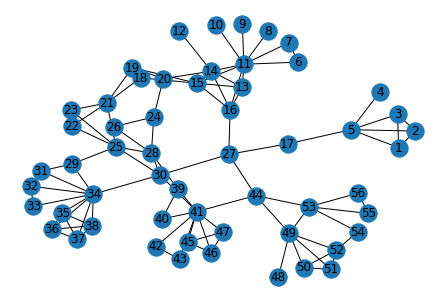

In [31]:
#Plot the graph
nx.draw(G,pos);
nx.draw_networkx_labels(G,pos); #dodamo oznake vozlisc

print( 'Articulation points: ' , list(nx.articulation_points(G)))

Sedaj dodamo dodatne povezave, da se odstranimo kritična vozlišča.

In [33]:
# G.add_edge(1,4);
# G.add_edge(4,7);

#nx.draw(G,pos);
#nx.draw_networkx_labels(G,pos); #dodamo oznake vozlisc

print( 'Articulation points: ' , list(nx.articulation_points(G)))

Articulation points:  [5, 11, 14, 41, 49, 53, 44, 34, 27, 17]


### Primer 2:
Graf z 56 vozlišči. 


In [34]:
plt.figure(figsize=[12,10])
G = nx.empty_graph(56);
G.remove_node(0);
G.add_edges_from([(1,2),(1,3),(1,5),(2,3),(2,5),(3,5),(4,5),(5,17),(6,7),(6,11),(7,11),(8,11),(9,11),(10,11),(11,13),(11,14),(11,15),(11,16),(12,14),(13,14),(13,15),(13,16),(14,15),(14,16),(14,20),(15,16),(15,18),(15,19),(16,27)
,(17,27),(18,21),(19,20),(19,21),(20,24),(21,22),(21,23),(21,25),(22,23),(22,25),(23,25),(24,26),(24,28),(25,28),(25,29),(25,30),(26,28),(28,30),(28,39),(27,30),(27,44),(29,31),(29,34),(30,34),(30,41),(31,34),(32,33),(32,34),(33,34)
,(34,35),(34,36),(34,37),(34,38),(35,36),(35,37),(35,38),(36,37),(36,38),(37,38),(39,40),(39,41),(40,41),(41,42),(41,43),(41,44),(41,45),(41,46),(41,47),(42,43),(44,53),(44,49),(45,46),(45,47),(46,47)
,(48,49),(49,50),(49,51),(49,52),(49,53),(50,51),(50,52),(51,52),(52,54),(53,54),(53,55),(53,56),(55,56)]);

pos = nx.kamada_kawai_layout(G)
#pos = nx.spectral_layout(G, scale=1);
#pos = nx.spring_layout(G,scale=2);

# nodes
#nx.draw_networkx_nodes(G,pos,node_size=300);

# edges
#nx.draw_networkx_edges(G,pos,width=2);

# labels
#nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif');

# plt.axis('off')
plt.show() # display

print (sorted(set(nx.articulation_points(G))));

<Figure size 864x720 with 0 Axes>

[5, 11, 14, 17, 27, 34, 41, 44, 49, 53]


### Naloga 4: 
Odstrani vsaj dve kritični točki in prikaži nov graf. 


### Naloga 5:

Uporabi obstoječe primere kode sprehodov v širino in globino ter kritičnih točk in jih testiraj na svojem primeru grafa. Kreiraj graf, ki naj vsebuje
* vsaj 15 vozlišč, vsa naj bodo povezana v eno omrežje, toda ni vsako vozlišče povezano z vsakim.

Ideje, graf lahko predstavlja: cestne povezave med mesti, letalske povezave, lokalno rač. omrežje... Dodaj tudi oznake in izriši graf.

Kreiraj graf in ga analiziraj s pomočjo vseh metod, ter izriši grafe prehodov algoritmov. Detektiraj kritična vozlišča, ter dodaj nove povezave, da jih odstraniš.

